In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/kaggle/input/front-end-developer-salaries-in-egypt-2023-survey/Front End Developer salaries in Egypt 2023 survey.csv')

In [56]:
df.head()

,طابع زمني,Job Title ( Position ),Years of Experience:,Company Type,Currency of Salary:,Monthly Salary:,Job Type:,Company Size:,Company Name:,Used Technology,Additional Comments:
0,12:59:12 ص 2023/08/20,Junior,1 to 2 years,Startup company,USD - United States Dollar,250$,Remote,NaN,Vultara,Angular,NaN
1,4:27:10 م 2023/08/20,Senior,5 to 7 years,Corporate company,EGP - Egyptian Pound,53000,Hybrid,51-200 employees,NaN,front end react,NaN
2,4:36:55 م 2023/08/20,Junior,1 to 2 years,Startup company,USD - United States Dollar,420 $,Remote,1-50 employees,Technomedic,React,NaN
3,4:52:12 م 2023/08/20,Junior,1 to 2 years,Corporate company,EGP - Egyptian Pound,7000,Onsite,1-50 employees,NaN,React,NaN
4,5:10:39 م 2023/08/20,Mid Sernior,2 to 3 years,Corporate company,EGP - Egyptian Pound,27k,Hybrid,201+ employees,Dsquares,React,NaN


#### optimizing columns naming

In [57]:

df.drop(columns=['طابع زمني'],inplace=True)
df.columns = df.columns.str.lower().str.replace('[(): ]', '_', regex=True)
df.columns = df.columns.str.rstrip('_')


#### salary and currancy columns

In [58]:
df['monthly_salary'].unique()

array(['250$', '53000', '420 $', '7000', '27k', '38000', '2600', '530',
       '500', '10000', '600', '1200', '7500', '16000', '1000 USD',
       '20000', '1000', '1200 USD', '11839', '6000', '550', '11000',
       '33k', '23000', '30000', '18000', '2000', '1300', '2800', '8000',
       '25000', '14', '17000', '21', '29000', '25', '2500', '750',
       '35000', '5000', '446', '45.000', '4500', '4000', '75000', '28000',
       '13000', '48K', '19000', 'Around 1936', '15000', '400', '24000',
       '12500', '12000', '1600', '350', '800', '700', '3200', '3000',
       '36000', '13800', '10K', '62000', '6500', '50', '9600', '1500',
       '20800', '20', '55000', '40', '14000', '32000', '22500', '22000',
       '45000', '32500', '9000', '16400', '4000 egp', '250', '5500',
       '9500', '0', '47000'], dtype=object)

In [59]:
mapping = {
    'k': '000',
    'K': '000',
    'egp': '',
    'USD': '',
    'Around': '',
    ' ': '',
    '$': '',
    '.': '',
}

for key, value in mapping.items():
    try:
        df['monthly_salary'] = df['monthly_salary'].str.replace(key, value)
    except:
        df['monthly_salary'] = df['monthly_salary'].replace(key, value)
        


In [60]:
df['monthly_salary'].unique()


array(['250', '53000', '420', '7000', '27000', '38000', '2600', '530',
       '500', '10000', '600', '1200', '7500', '16000', '1000', '20000',
       '11839', '6000', '550', '11000', '33000', '23000', '30000',
       '18000', '2000', '1300', '2800', '8000', '25000', '14', '17000',
       '21', '29000', '25', '2500', '750', '35000', '5000', '446',
       '45000', '4500', '4000', '75000', '28000', '13000', '48000',
       '19000', '1936', '15000', '400', '24000', '12500', '12000', '1600',
       '350', '800', '700', '3200', '3000', '36000', '13800', '62000',
       '6500', '50', '9600', '1500', '20800', '20', '55000', '40',
       '14000', '32000', '22500', '22000', '32500', '9000', '16400',
       '5500', '9500', '0', '47000'], dtype=object)

In [61]:

df['monthly_salary']=df['monthly_salary'].astype('int32')

In [62]:
df=df[df['monthly_salary']>20]

In [63]:
df['currency_of_salary'].unique()

array(['USD - United States Dollar', 'EGP - Egyptian Pound',
       'SAR - Saudi Riyal', 'كسالاري متوقع  ممن ٧ ل٩ ', 'EUR - Euro'],
      dtype=object)

In [64]:
df[df['currency_of_salary']=='EGP - Egyptian Pound'].head()

,job_title___position,years_of_experience,company_type,currency_of_salary,monthly_salary,job_type,company_size,company_name,used_technology,additional_comments
1,Senior,5 to 7 years,Corporate company,EGP - Egyptian Pound,53000,Hybrid,51-200 employees,NaN,front end react,NaN
3,Junior,1 to 2 years,Corporate company,EGP - Egyptian Pound,7000,Onsite,1-50 employees,NaN,React,NaN
4,Mid Sernior,2 to 3 years,Corporate company,EGP - Egyptian Pound,27000,Hybrid,201+ employees,Dsquares,React,NaN
5,Senior,+7 years,Corporate company,EGP - Egyptian Pound,38000,Hybrid,201+ employees,_vois,Angular,NaN
7,Junior,Less than 1 year,Corporate company,EGP - Egyptian Pound,7000,Onsite,1-50 employees,NaN,Angular,NaN


In [65]:
# Convert the 'salary' column to USD based on the 'currency' column
exchange_rates = {
    'EGP - Egyptian Pound': 0.032,  # Example exchange rate for EGP to USD
    'USD - United States Dollar': 1.0,    # USD to USD, 1:1
    'EUR - Euro': 0.94,   # Example exchange rate for EUR to USD
    'SAR - Saudi Riyal':0.27,
    'كسالاري متوقع  ممن ٧ ل٩ ':0.032
}

df['monthly_salary_usd'] = df.apply(lambda row: row['monthly_salary'] * exchange_rates[row['currency_of_salary']], axis=1)

In [66]:
df['monthly_salary_egp']=df['monthly_salary_usd']*30.95
df['monthly_salary_egp']=df['monthly_salary_egp'].astype('int32')
df['monthly_salary_usd']=df['monthly_salary_usd'].astype('int32')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 0 to 176
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   job_title___position  173 non-null    object
 1   years_of_experience   173 non-null    object
 2   company_type          173 non-null    object
 3   currency_of_salary    173 non-null    object
 4   monthly_salary        173 non-null    int32 
 5   job_type              173 non-null    object
 6   company_size          170 non-null    object
 7   company_name          83 non-null     object
 8   used_technology       160 non-null    object
 9   additional_comments   14 non-null     object
 10  monthly_salary_usd    173 non-null    int32 
 11  monthly_salary_egp    173 non-null    int32 
dtypes: int32(3), object(9)
memory usage: 15.5+ KB


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_salary,173.0,13715.358382,13819.383356,21.0,5000.0,8000.0,19000.0,75000.0
monthly_salary_usd,173.0,1057.531792,3739.849883,0.0,250.0,448.0,928.0,48000.0
monthly_salary_egp,173.0,32731.526012,115748.197141,20.0,7737.0,13865.0,28721.0,1485600.0


In [69]:
df.head(2)

,job_title___position,years_of_experience,company_type,currency_of_salary,monthly_salary,job_type,company_size,company_name,used_technology,additional_comments,monthly_salary_usd,monthly_salary_egp
0,Junior,1 to 2 years,Startup company,USD - United States Dollar,250,Remote,NaN,Vultara,Angular,NaN,250,7737
1,Senior,5 to 7 years,Corporate company,EGP - Egyptian Pound,53000,Hybrid,51-200 employees,NaN,front end react,NaN,1696,52491


#### cleaning and proccess year of exp col

In [70]:
df.years_of_experience.unique()

array(['1 to 2 years', '5 to 7 years', '2 to 3 years', '+7 years',
       'Less than 1 year', '3 to 5 years', '6 Months', '15', '10+'],
      dtype=object)

In [71]:

def preprocess_experience(value):
    if 'Less than' in value:
        return '0-1 year'
    elif '6 Months' in value:
        return '0-1 year'
    elif '15' in value:
        return '10+'
  
    else:
        return value

# Apply the preprocess_experience function to the 'years_of_experience' column
df['years_of_experience'] = df['years_of_experience'].apply(preprocess_experience)


In [72]:
df.years_of_experience.unique()


array(['1 to 2 years', '5 to 7 years', '2 to 3 years', '+7 years',
       '0-1 year', '3 to 5 years', '10+'], dtype=object)

##### exploring additional_comments col

In [73]:
comments=df[df['additional_comments'].notnull()]['additional_comments']
for i in comments:
    print(i)
    print('__'*30)

معنديش احلى مسا عليكو  للتواصل ولو في فرصة تدريب ده  رقمي 😁 01098309021
____________________________________________________________
Yes
____________________________________________________________
Well ,sometimes. I feel like I'm getting extra work ,I feel the salary is too low
____________________________________________________________
Salary is for part time 4 hours / day, Also it's hourly rate as freelancer 22 € / hour 
It 's located in Germany 
The company size is less than 10 people 
____________________________________________________________
I wish to work in your company
____________________________________________________________
...
____________________________________________________________
They provide internships but for free for like 3 months 
____________________________________________________________
No medical insurance though, I am satisfied although there isn't really alot of growth and learning compared to other companies, but for me turn it down for a much lowe

In [74]:
df.drop(columns=['additional_comments'],inplace=True)

In [75]:
df.head()

,job_title___position,years_of_experience,company_type,currency_of_salary,monthly_salary,job_type,company_size,company_name,used_technology,monthly_salary_usd,monthly_salary_egp
0,Junior,1 to 2 years,Startup company,USD - United States Dollar,250,Remote,NaN,Vultara,Angular,250,7737
1,Senior,5 to 7 years,Corporate company,EGP - Egyptian Pound,53000,Hybrid,51-200 employees,NaN,front end react,1696,52491
2,Junior,1 to 2 years,Startup company,USD - United States Dollar,420,Remote,1-50 employees,Technomedic,React,420,12999
3,Junior,1 to 2 years,Corporate company,EGP - Egyptian Pound,7000,Onsite,1-50 employees,NaN,React,224,6932
4,Mid Sernior,2 to 3 years,Corporate company,EGP - Egyptian Pound,27000,Hybrid,201+ employees,Dsquares,React,864,26740


In [76]:
df.job_title___position.unique()

array(['Junior', 'Senior', 'Mid Sernior', 'Internship',
       'Tech / Team Lead'], dtype=object)

In [77]:
df.company_type.unique()


array(['Startup company', 'Corporate company', 'Tech company ',
       'Freelancer', 'Out Source company', 'لسه ما اشتغلتش',
       'Digital marketing ', "Don't know", "I haven't worked yet",
       'Product owner ', 'Branding company', 'Technology company '],
      dtype=object)

##### used_technology

In [78]:
df.used_technology.unique()


array(['Angular ', 'front end react', 'React', 'Angular', 'React Native',
       'Vue', 'Next', 'Frontend (Angular)', 'wordpress',
       'Wordpress and a little angular', nan, 'Angular and ionic',
       'React, Typescript ', 'Angular & React', 'React . angular ',
       'React ', 'React, Vue', 'angular',
       'Frontend ( react , html , css , js, jquery, bootstrap,wordpress)',
       'Frontend', 'React but in work i never used framework for now',
       'React, vue, next', 'Angular, react', 'React, React Native',
       'Angular | Vue', 'Vue js ',
       'React, React Native, Redux, Vite, Node, AWS, Docker, Github',
       'React - NextJs', 'React and angular ', 'React js ',
       'Angular, React, Vue', 'Ionic,angular', 'nuxt', 'React-nextjs',
       'React and the eco system around it', 'Angular, Ionic, Capacitor ',
       'Native js ', 'JS and angular ', 'HTML, Javascript, React',
       'Huawei technology ', 'Html, Css, JavaScript ', 'Angular, vue',
       'react', 'Angular, Jav

In [79]:
technologies = ['react','react native','typescript','redux' ,'wordpress','js','angular','node', 'vue', 'nextjs','jquery','bootstrap']

# Create separate columns for each technology and populate them with 1 or 0
for tech in technologies:
    df.loc[:,tech] = df['used_technology'].str.contains(tech, case=False, na=False).astype(int)


In [80]:
df.head()

,job_title___position,years_of_experience,company_type,currency_of_salary,monthly_salary,job_type,company_size,company_name,used_technology,monthly_salary_usd,...,typescript,redux,wordpress,js,angular,node,vue,nextjs,jquery,bootstrap
0,Junior,1 to 2 years,Startup company,USD - United States Dollar,250,Remote,NaN,Vultara,Angular,250,...,0,0,0,0,1,0,0,0,0,0
1,Senior,5 to 7 years,Corporate company,EGP - Egyptian Pound,53000,Hybrid,51-200 employees,NaN,front end react,1696,...,0,0,0,0,0,0,0,0,0,0
2,Junior,1 to 2 years,Startup company,USD - United States Dollar,420,Remote,1-50 employees,Technomedic,React,420,...,0,0,0,0,0,0,0,0,0,0
3,Junior,1 to 2 years,Corporate company,EGP - Egyptian Pound,7000,Onsite,1-50 employees,NaN,React,224,...,0,0,0,0,0,0,0,0,0,0
4,Mid Sernior,2 to 3 years,Corporate company,EGP - Egyptian Pound,27000,Hybrid,201+ employees,Dsquares,React,864,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df.drop(columns=['currency_of_salary','monthly_salary'],inplace=True)


In [82]:
df.company_type.unique()

array(['Startup company', 'Corporate company', 'Tech company ',
       'Freelancer', 'Out Source company', 'لسه ما اشتغلتش',
       'Digital marketing ', "Don't know", "I haven't worked yet",
       'Product owner ', 'Branding company', 'Technology company '],
      dtype=object)

In [83]:
df[df['company_type']=="Don't know"].head()

,job_title___position,years_of_experience,company_type,job_type,company_size,company_name,used_technology,monthly_salary_usd,monthly_salary_egp,react,...,typescript,redux,wordpress,js,angular,node,vue,nextjs,jquery,bootstrap
61,Junior,0-1 year,Don't know,Hybrid,1-50 employees,Smart Link,React,144,4456,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df.loc[:,'company_type']=df['company_type'].replace("Don't know",'Tech company ')
df.loc[:,'company_type']=df['company_type'].replace('Technology company ','Tech company ')


In [85]:
values_to_drop = ["I haven't worked yet", 'لسه ما اشتغلتش']

# Drop rows containing the specified values in the 'company_type' column
df = df[~df['company_type'].isin(values_to_drop)]


In [86]:
df.head()

,job_title___position,years_of_experience,company_type,job_type,company_size,company_name,used_technology,monthly_salary_usd,monthly_salary_egp,react,...,typescript,redux,wordpress,js,angular,node,vue,nextjs,jquery,bootstrap
0,Junior,1 to 2 years,Startup company,Remote,NaN,Vultara,Angular,250,7737,0,...,0,0,0,0,1,0,0,0,0,0
1,Senior,5 to 7 years,Corporate company,Hybrid,51-200 employees,NaN,front end react,1696,52491,1,...,0,0,0,0,0,0,0,0,0,0
2,Junior,1 to 2 years,Startup company,Remote,1-50 employees,Technomedic,React,420,12999,1,...,0,0,0,0,0,0,0,0,0,0
3,Junior,1 to 2 years,Corporate company,Onsite,1-50 employees,NaN,React,224,6932,1,...,0,0,0,0,0,0,0,0,0,0
4,Mid Sernior,2 to 3 years,Corporate company,Hybrid,201+ employees,Dsquares,React,864,26740,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df['company_name'].value_counts()


company_name
VOIS                          5
Confidential                  2
Vultara                       1
Graspstudios                  1
Femto                         1
                             ..
Smart Link                    1
Crocosoft                     1
Astra Tech                    1
CryptDev                      1
Digital Lines Development     1
Name: count, Length: 78, dtype: int64

In [88]:
df[df['company_name']=='VOIS']

,job_title___position,years_of_experience,company_type,job_type,company_size,company_name,used_technology,monthly_salary_usd,monthly_salary_egp,react,...,typescript,redux,wordpress,js,angular,node,vue,nextjs,jquery,bootstrap
28,Senior,5 to 7 years,Corporate company,Hybrid,201+ employees,VOIS,React,960,29712,1,...,0,0,0,0,0,0,0,0,0,0
31,Mid Sernior,2 to 3 years,Out Source company,Hybrid,201+ employees,VOIS,React,576,17827,1,...,0,0,0,0,0,0,0,0,0,0
42,Junior,1 to 2 years,Corporate company,Hybrid,201+ employees,VOIS,React,0,20,1,...,0,0,0,0,0,0,0,0,0,0
48,Mid Sernior,2 to 3 years,Corporate company,Hybrid,201+ employees,VOIS,Angular,736,22779,0,...,0,0,0,0,1,0,0,0,0,0
56,Senior,3 to 5 years,Corporate company,Remote,201+ employees,VOIS,"React, React Native",1120,34664,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df.rename(columns={'job_title___position':'job_title_position'},inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 176
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_title_position   171 non-null    object
 1   years_of_experience  171 non-null    object
 2   company_type         171 non-null    object
 3   job_type             171 non-null    object
 4   company_size         169 non-null    object
 5   company_name         83 non-null     object
 6   used_technology      158 non-null    object
 7   monthly_salary_usd   171 non-null    int32 
 8   monthly_salary_egp   171 non-null    int32 
 9   react                171 non-null    int64 
 10  react native         171 non-null    int64 
 11  typescript           171 non-null    int64 
 12  redux                171 non-null    int64 
 13  wordpress            171 non-null    int64 
 14  js                   171 non-null    int64 
 15  angular              171 non-null    int64 
 16  node         

Text(0.5, 1.0, 'compare between job type')

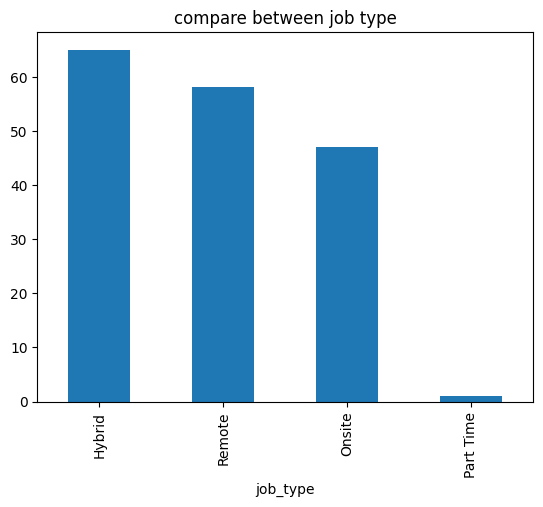

In [91]:
df['job_type'].value_counts().plot(kind='bar')
plt.title('compare between job types')

#### to be continue...